<a href="https://colab.research.google.com/github/pmSLUMSHDS/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HDS-5210-01 FINAL PROJECT**

BACKGROUND INFO: I had initially planned to do my final project on rise of telemedicine and telehealth, especially since COVID, and how effective or ineffective it has been. Unfortunately, I had an extremely difficult time locating enough useful datasets that could be combined in some meaningful way. So I moved on from that idea and decided on looking at the levels of contaminants in the drinking water in MA (where I currently reside), and how that might correlate to the birth defect rates in the state and cancer rates. I have pulled informtion from 2011-2015 for all counties in MA. The plan is to get it loaded, cleaned (if necessary), merged by counties, to see how the numbers stack up.




**WEBSITES UTILIZED & GOOGLE DRIVE LINK**

I queried or downloaded my 18 datasets individually from the following 2 sites. (.csv & .xlsx)

https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html

https://matracking.ehs.state.ma.us/


Google drive link to all files used for project
https://drive.google.com/drive/folders/1vR7ydVa_Kdz-F2CeW8dPlcBJ-UCueL2A?usp=drive_link



# **1.0 DATASETS**



**PSEUDOCODE for Steps 1.0 - 1.4**

loading in pandas and all 18 datasets, broken up into categories- water contaminants, birth defects, and cancers, saving each to a separate variable.

loaded MA population dataset that had several headers that I attempted to either ignore or remove.

renamed the columns instead after spending too much time on header[ ] and iloc[ ].

used .head( ) to confirm column renaming worked.

In [1]:
#importing pandas and numpy

import pandas as pd
import numpy as np


## **1.1. WATER CONTAMINANTS**



Drinking water contaminants can lead to many health issues for residents. The extent to which people may be effected depends on the specific contaminant, the level of the contaminant in the water and the potency of that contaminant. The US Environmental Protection Agency (EPA) monitors for roughly 90 different contaminants. In MA, the contaminants that have exceeded the maximum contaminant levels (MCLs) are arsenic, di(2-ethylhexyl)phthalate (or DEHP), haloacetic acid (or HAA), nitrates, lead, uranium, and total trihalomethanes (or TTHM), all of which can lead to adverse health effects. We will be looking at data from 2011-2015.

Per Mass.gov, the MCLs for the state of MA are as follows:

Arsenic: 10 ug/mL

DEHP: 6 ug/mL

HAA: 60 ug/mL

Nitrate: 10 ug/mL

Lead: 15 ug/mL

TTHM: 80 ug/mL

(Citation: https://matracking.ehs.state.ma.us/Environmental-Data/Water-Quality/index.html, retrieved 10DEC23.)

(Citation for MCLs: https://www.mass.gov/guides/drinking-water-standards-and-guidelines#-massachusetts-maximum-contaminant-levels-(mmcls)-, retrieved 11DEC23.)

In [2]:
#loading contaminant datasets
arsenic = pd.read_csv("AS-drinking-water.csv")
DEHP = pd.read_csv("DEPH-drinking-water.csv")
haloacetic_acid = pd.read_csv("HAA-drinking-water.csv")
Nitrate = pd.read_csv("Ni-drinking-water.csv")
Lead = pd.read_csv("Pb-drinking-water.csv")
total_trihalomethanes = pd.read_csv("TTHM-drinking-water.csv")

## **1.2. BIRTH DEFECTS**



Birth defects are classes of abnormalitles that are present at birth and can be caused by many factors including heredity, prenatal care or lack thereof, drugs, or chemicals. But there is also a link between certain environmental factors, such as drinking water contaminants, that can contribute to these mental and physical defects. We will look at the 5 specific birth defect rates for MA for all counties during 2011-2015.



Trisomy 21 is Down's Syndrome where baby is born with an extra chromosome the interupts normal development.

Cleft Lip/Palate is incomplete closure of the upper lip or the roof of the mouth.

Limb defects refers to incomplete formation of either upper or lower limbs.

Spina Bifida is a defect in baby's neural tube preventing complete closure.

Gastroschisis is when baby's instestines and sometimes other organs poke out through a hole in tummy wall.



(Citation: https://matracking.ehs.state.ma.us/Health-Data/Birth-Defects.html, retrieved 10DEC23.)

In [3]:
#loading birth defect datasets
cleft_lip_palate = pd.read_csv("CP-birth-defects.csv")
trisomy21 = pd.read_csv("T21-birth-defects.csv")
spina_bifida = pd.read_csv("SB-birth-defects.csv")
limb_defects = pd.read_csv("limb-birth-defects.csv")
gastroschisis = pd.read_csv("Gastro-birth-defects.csv")

## **1.3. CANCER RATES**


Similar to birth defects, cancer has many risk factors that can cause one to develop cancer. Diet, heredity, chemicals, and drugs can all play a part but environmental factors can increase a person's chances. Drinking water contaminants can lead to increased risks. We will look at kidney, bladder, and non-hogkins lymphoma in males and females in all MA counties for 2011-2015.

(Citation: https://matracking.ehs.state.ma.us/Health-Data/Cancer/index.html, retrieved 10DEC23.)

In [4]:
#loading cancer datasets
female_NHL = pd.read_csv("female-NHL-cancer-combined.csv")
male_NHL = pd.read_csv("male-NHL-cancer-combined.csv")
female_bladder = pd.read_csv("female-bladder-cancer-combined.csv")
male_bladder = pd.read_csv("Male-bladder-cancer-combined.csv")
female_kidney = pd.read_csv("female-kidney-cancer-combined.csv")
male_kidney = pd.read_csv("male-kidney-cancer-combined.csv")

## **1.4. MA POPULATION**


Population data in MA for 2011-2015 by county

In [5]:
#loading in the population dataset
#MA_pop = pd.read_excel("MA_pop_co-est2019-annres-25.xlsx", header = [1, 2, 3])
MA_pop = pd.read_excel("MA_pop_co-est2019-annres-25.xlsx")
MA_pop = MA_pop.iloc[3:]

MA_pop.head() #checking formatting. Tried using header[] or iloc[] to remove the first 3 rows, but still not formatted right. Will try renaming  columns instead.

,table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,Massachusetts,6547629,6547785,6566307,6613583.0,6663005.0,6713315.0,6762596.0,6794228.0,6823608.0,6859789.0,6882635.0,6892503.0
4,".Barnstable County, Massachusetts",215888,215880,215899,215356.0,214788.0,214518.0,214289.0,213877.0,213559.0,213581.0,213471.0,212990.0
5,".Berkshire County, Massachusetts",131219,131274,131317,130547.0,130284.0,129488.0,128856.0,127858.0,127067.0,126353.0,125901.0,124944.0
6,".Bristol County, Massachusetts",548285,548242,549166,549308.0,551120.0,552379.0,555090.0,556863.0,558070.0,560941.0,564092.0,565217.0
7,".Dukes County, Massachusetts",16535,16535,16572,16697.0,16829.0,17159.0,17297.0,17274.0,17315.0,17311.0,17329.0,17332.0


In [6]:
#renaming columns properly
new_columns = {"table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)": "County", "Unnamed: 1": "Census", "Unnamed: 2": "Estimates Base", "Unnamed: 3": "2010", "Unnamed: 4": "2011", "Unnamed: 5": "2012", "Unnamed: 6": "2013",
               "Unnamed: 7": "2014", "Unnamed: 8": "2015", "Unnamed: 9": "2016", "Unnamed: 10": "2017", "Unnamed: 11": "2018", "Unnamed: 12": "2019"}

MA_pop.rename(columns=new_columns, inplace=True)

MA_pop.head()

,County,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,Massachusetts,6547629,6547785,6566307,6613583.0,6663005.0,6713315.0,6762596.0,6794228.0,6823608.0,6859789.0,6882635.0,6892503.0
4,".Barnstable County, Massachusetts",215888,215880,215899,215356.0,214788.0,214518.0,214289.0,213877.0,213559.0,213581.0,213471.0,212990.0
5,".Berkshire County, Massachusetts",131219,131274,131317,130547.0,130284.0,129488.0,128856.0,127858.0,127067.0,126353.0,125901.0,124944.0
6,".Bristol County, Massachusetts",548285,548242,549166,549308.0,551120.0,552379.0,555090.0,556863.0,558070.0,560941.0,564092.0,565217.0
7,".Dukes County, Massachusetts",16535,16535,16572,16697.0,16829.0,17159.0,17297.0,17274.0,17315.0,17311.0,17329.0,17332.0


# **2.0 TRANSFORMATIONS & JOINS**


## **2.1   MA_pop dataset**

**PSEUDOCODE for Step 2.1**


All datasets queried I was able to pull just 2011-2015. The MA population dataset needed to be filtered for those dates. First attempt did not work.

Moved on to just dropping the columns not needed instead, which did work.

used .head() to double check

added an average population column for 2011-2015 for each county using .mean and axis=1 for the rows

looked up how to drop the last 5 rows at geekforgeeks.org as some extra unnecessary info was imported with table

looked at dataframe to double check bottom rows were indeed gone.


In [7]:
#filtering MA population dataset for just 2011-2015 and dropping other columns

#years = [2011, 2012, 2013, 2014, 2015]
#MA_pop = MA_pop[MA_pop["County"].isin[MA_pop.columns[1:]]](years)


columns_drop = ['Census', 'Estimates Base', '2010', '2016', '2017', '2018', '2019']
MA_pop = MA_pop.drop(columns=columns_drop)

MA_pop.head()


,County,2011,2012,2013,2014,2015
3,Massachusetts,6613583.0,6663005.0,6713315.0,6762596.0,6794228.0
4,".Barnstable County, Massachusetts",215356.0,214788.0,214518.0,214289.0,213877.0
5,".Berkshire County, Massachusetts",130547.0,130284.0,129488.0,128856.0,127858.0
6,".Bristol County, Massachusetts",549308.0,551120.0,552379.0,555090.0,556863.0
7,".Dukes County, Massachusetts",16697.0,16829.0,17159.0,17297.0,17274.0


In [8]:
#adding an average population column over the 2011-2015 timeframe

MA_pop['avg_pop'] =  MA_pop.mean(axis=1)

#MA_pop

MA_pop.drop(MA_pop.tail(5).index, inplace = True) #geeksforgeeks.org, looked up removing rows

MA_pop


<ipython-input-8-2d8d174e5f46>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  MA_pop['avg_pop'] =  MA_pop.mean(axis=1)


,County,2011,2012,2013,2014,2015,avg_pop
3,Massachusetts,6613583.0,6663005.0,6713315.0,6762596.0,6794228.0,6709345.4
4,".Barnstable County, Massachusetts",215356.0,214788.0,214518.0,214289.0,213877.0,214565.6
5,".Berkshire County, Massachusetts",130547.0,130284.0,129488.0,128856.0,127858.0,129406.6
6,".Bristol County, Massachusetts",549308.0,551120.0,552379.0,555090.0,556863.0,552952.0
7,".Dukes County, Massachusetts",16697.0,16829.0,17159.0,17297.0,17274.0,17051.2
8,".Essex County, Massachusetts",751507.0,757338.0,764563.0,771653.0,776865.0,764385.2
9,".Franklin County, Massachusetts",71692.0,71687.0,71361.0,71298.0,70866.0,71380.8
10,".Hampden County, Massachusetts",466171.0,466955.0,467747.0,469455.0,469113.0,467888.2
11,".Hampshire County, Massachusetts",160154.0,160419.0,160856.0,160918.0,160709.0,160611.2
12,".Middlesex County, Massachusetts",1524848.0,1542867.0,1560204.0,1574993.0,1585432.0,1557668.8


## **2.2. CONTAMINANTS datasets**

**PSEUDOCODE for Step 2.2**

added a Contaminant column to the separate contaminant tables as it was only the title of the table that let you know which contaminant it was referring to. Repeated that column addition for all 6 contaminants and placed the column next to the level of ug/L instead of at the end of the table. Also added a MCL number for each specific contaminant.

Then combined all the separate contaminant tables together and saved to all_contaminants. Opened an empty dataframe, established a list of the years in question, made a for loop for each year in years, which looped through each separate contaminant file for each year and used concat to pull them all together and saved as combined. Then appended back to the empty dataframe, all_contaminants.

Sorted contaminants file by county, year

renamed a column to Units, checked change using .head()

adding a rolling avg column for time frame (2011-2015) to match other datasets,checked dataframe to see that it worked.

In [9]:
#adding the specific contaminant to the table as a separate column and the MCL for that contaminant and repeating that for all other contaminants.

#arsenic
#arsenic['Contaminant'] = 'Arsenic'

AS_column_spot = 5 #used geeksforgeeks to assist in remembering how to add column to a specific spot, still took some maneuvering
#arsenic.insert(loc = [5:, 'Contaminant'] =  'Arsenic', )
#arsenic.insert(iloc = AS_column_spot, columns='Contaminant', value= 'Arsenic', axis=1)
arsenic.insert(loc = AS_column_spot, column='Contaminant', value= 'Arsenic')
MCL_AS = 3
arsenic.insert(loc = MCL_AS, column='MCL (ug/L)', value= '10.00')

arsenic

,County Description,Year,Community Water System (CWS),MCL (ug/L),Concentration,Concentration.1,Contaminant,System Population Served,County,Percent Pop Served
0,Worcester,2012,Auburn Water District,10.00,11,ug/L,Arsenic,11763,16270.89420,72.294736
1,Worcester,2012,Auburn Water District,10.00,18,ug/L,Arsenic,11763,16270.89420,72.294736
2,Worcester,2013,Auburn Water District,10.00,24,ug/L,Arsenic,11763,16305.29259,72.142220
3,Worcester,2013,Auburn Water District,10.00,25,ug/L,Arsenic,11763,16305.29259,72.142220


In [10]:
#DEHP
DEHP_column_spot = 5
MCL_DEHP = 3
DEHP.insert(loc = DEHP_column_spot, column='Contaminant', value= 'DEPH')
DEHP.insert(loc = MCL_DEHP, column='MCL (ug/L)', value= '6.00')
DEHP

,County Description,Year,Community Water System (CWS),MCL (ug/L),Concentration,Concentration.1,Contaminant,System Population Served,County,Percent Pop Served
0,Worcester,2014,Trail Ridge Condominiums,6.00,33,ug/L,DEPH,104,6758.37222,1.538832
1,Worcester,2014,Trail Ridge Condominiums,6.00,45,ug/L,DEPH,104,6758.37222,1.538832


In [11]:
#haloacetic_acid
HAA_column_spot = 5
MCL_HAA = 3
haloacetic_acid.insert(loc = HAA_column_spot, column='Contaminant', value= 'Haloacetic acid')
haloacetic_acid.insert(loc = MCL_HAA, column='MCL in ug/L', value= '60.00')
haloacetic_acid

,County Description,Year,Community Water System (CWS),MCL in ug/L,Concentration,Concentration.1,Contaminant,System Population Served,County,Percent Pop Served
0,Plymouth,2014,Abington/Rockland Joint Water Works,60.00,66.2,ug/L,Haloacetic acid,33404,16985.07686,99
1,Plymouth,2014,Abington/Rockland Joint Water Works,60.00,95.2,ug/L,Haloacetic acid,33404,16985.07686,99
2,Plymouth,2014,Abington/Rockland Joint Water Works,60.00,98.4,ug/L,Haloacetic acid,33404,16985.07686,99
3,Plymouth,2015,Abington/Rockland Joint Water Works,60.00,84.0,ug/L,Haloacetic acid,33404,17223.81518,99


In [12]:
#Nitrate
Ni_column_spot = 5
MCL_Ni = 3
Nitrate.insert(loc = Ni_column_spot, column='Contaminant', value= 'Nitrate')
Nitrate.insert(loc = MCL_Ni, column='MCL (ug/L)', value= '10.00')
Nitrate

,County Description,Year,Community Water System (CWS),MCL (ug/L),Concentration,Concentration.1,Contaminant,System Population Served,County,Percent Pop Served
0,Worcester,2013,Hubbardston House Apartments,10.00,15,ug/L,Nitrate,40,4498.14265,0.889256


In [13]:
#Lead
Pb_column_spot = 5
MCL_Pb = 3
Lead.insert(loc = Pb_column_spot, column='Contaminant', value= 'Lead')
Lead.insert(loc = MCL_Pb, column='MCL (ug/L)', value= '15.00')
Lead

,County Description,Year,Community Water System (CWS),MCL (ug/L),Concentration,Concentration.1,Contaminant,System Population Served,County,Percent Pop Served
0,Berkshire,2011,Egremont Water Dept.,15.00,54.0,ug/L,Lead,600,1204.14621,49.827836
1,Bristol,2012,M.A.M.O. Realty LLC,15.00,21.0,ug/L,Lead,35,15829.62383,0.221104
2,Bristol,2012,M.A.M.O. Realty LLC,15.00,25.0,ug/L,Lead,35,15829.62383,0.221104
3,Essex,2012,Manchester By The Sea DPW,15.00,19.0,ug/L,Lead,5609,5113.69509,99.000000
4,Hampshire,2011,Pine Valley Plantation,15.00,18.0,ug/L,Lead,600,14816.22598,4.049614
5,Middlesex,2011,Juniper Hill Water Company,15.00,36.0,ug/L,Lead,220,6687.06600,3.289933
6,Middlesex,2011,Littleton Lyne Apartments,15.00,18.0,ug/L,Lead,150,7535.79603,1.990500
7,Middlesex,2011,Littleton Lyne Apartments,15.00,20.0,ug/L,Lead,150,7535.79603,1.990500
8,Middlesex,2011,Malden Water Division (MWRA),15.00,18.4,ug/L,Lead,59450,60749.55073,97.860806
9,Middlesex,2011,Pine Hill Condominium,15.00,142.0,ug/L,Lead,95,22256.63370,0.426839


In [14]:
#total_trihalomethanes
TTHM_column_spot = 5
MCL_TTHM = 3
total_trihalomethanes.insert(loc = MCL_TTHM, column='MCL (ug/L)', value= '80.00')
total_trihalomethanes.insert(loc = TTHM_column_spot, column='Contaminant', value= 'TTHM')
total_trihalomethanes

,County Description,Year,Community Water System (CWS),MCL (ug/L),Concentration,Contaminant,Concentration.1,System Population Served,County,Percent Pop Served
0,Barnstable,2015,Falmouth Water Dept.,80.00,80.70,TTHM,ug/L,33000,31300.12643,99.000000
1,Bristol,2014,Somerset Water Department,80.00,82.40,TTHM,ug/L,18165,18384.73686,98.804786
2,Bristol,2015,Dartmouth Water Division,80.00,86.70,TTHM,ug/L,24412,35886.56374,68.025460
3,Essex,2013,Peabody Water Dept.,80.00,83.00,TTHM,ug/L,52377,53272.12622,98.319710
4,Essex,2013,Peabody Water Dept.,80.00,97.00,TTHM,ug/L,52377,53272.12622,98.319710
5,Essex,2013,Peabody Water Dept.,80.00,110.00,TTHM,ug/L,52377,53272.12622,98.319710
6,Hampden,2011,Chester Water Dept.,80.00,84.44,TTHM,ug/L,750,1340.88229,55.933321
7,Hampden,2012,Blandford Water Dept.,80.00,81.50,TTHM,ug/L,874,1234.20442,70.814849
8,Middlesex,2014,North Reading Water Dept.,80.00,81.00,TTHM,ug/L,15500,15834.00052,97.890612
9,Middlesex,2015,"Maynard DPW, Water Division",80.00,88.00,TTHM,ug/L,10754,10397.54050,99.000000


In [15]:
#combining all 6 of the separate contaminant files

all_contaminants = pd.DataFrame()

#years = ['2011', '2012', '2013', '2014', '2015'].....punctaution!!
years = [2011, 2012, 2013, 2014, 2015]

for year in years:
    #AS_new = arsenic[arsenic("Year") == Year]
    AS_new = arsenic[arsenic["Year"] == year]
    Pb_new = Lead[Lead["Year"] == year]
    HAA_new = haloacetic_acid[haloacetic_acid["Year"] == year]
    TTHM_new = total_trihalomethanes[total_trihalomethanes["Year"] == year]
    DEHP_new = DEHP[DEHP["Year"] == year]
    Ni_new = Nitrate[Nitrate["Year"] == year]

    #combined = pd.concat('AS_new', 'Pb_new', 'HAA_new', 'TTHM_new', 'DEHP_new', 'Ni_new', ignore_index=True)
    combined = pd.concat([AS_new, Pb_new, HAA_new, TTHM_new, DEHP_new, Ni_new], ignore_index=True)

    all_contaminants = all_contaminants.append(combined)


<ipython-input-15-00639d854f6c>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_contaminants = all_contaminants.append(combined)
<ipython-input-15-00639d854f6c>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_contaminants = all_contaminants.append(combined)
<ipython-input-15-00639d854f6c>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_contaminants = all_contaminants.append(combined)
<ipython-input-15-00639d854f6c>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_contaminants = all_contaminants.append(combined)
<ipython-input-15-00639d854f6c>:20: FutureWarning: The frame.append method is deprecated and will be rem

In [16]:
#sorting by county and year

all_contaminants.sort_values(by=['County Description', 'Year'], inplace=True) #geeksforgeeks to the rescue, looked up sorting functions in python
all_contaminants

,County Description,Year,Community Water System (CWS),MCL (ug/L),Concentration,Concentration.1,Contaminant,System Population Served,County,Percent Pop Served,MCL in ug/L
5,Barnstable,2015,Falmouth Water Dept.,80.00,80.7,ug/L,TTHM,33000,31300.12643,99.000000,NaN
0,Berkshire,2011,Egremont Water Dept.,15.00,54.0,ug/L,Lead,600,1204.14621,49.827836,NaN
2,Bristol,2012,M.A.M.O. Realty LLC,15.00,21.0,ug/L,Lead,35,15829.62383,0.221104,NaN
3,Bristol,2012,M.A.M.O. Realty LLC,15.00,25.0,ug/L,Lead,35,15829.62383,0.221104,NaN
6,Bristol,2014,Somerset Water Department,80.00,82.4,ug/L,TTHM,18165,18384.73686,98.804786,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2,Worcester,2014,Madden Estates,15.00,26.0,ug/L,Lead,50,3714.86384,1.345944,NaN
10,Worcester,2014,Trail Ridge Condominiums,6.00,33.0,ug/L,DEPH,104,6758.37222,1.538832,NaN
11,Worcester,2014,Trail Ridge Condominiums,6.00,45.0,ug/L,DEPH,104,6758.37222,1.538832,NaN
11,Worcester,2015,Cherry Valley/ Rochdale Water District,80.00,81.0,ug/L,TTHM,3685,11172.61396,32.982434,NaN


In [17]:
#renaming columns, dropping some columns

columns_drop= ['System Population Served', 'County', 'Percent Pop Served']
all_contaminants = all_contaminants.drop(columns=columns_drop)
all_contaminants.rename(columns={'Concentration.1': 'Units', 'County Description': 'County'}, inplace=True)
all_contaminants.rename(columns={'Concentration': 'Concentration (ug/L)'}, inplace=True)
all_contaminants = all_contaminants.reset_index(drop=True)

all_contaminants.head()


,County,Year,Community Water System (CWS),MCL (ug/L),Concentration (ug/L),Units,Contaminant,MCL in ug/L
0,Barnstable,2015,Falmouth Water Dept.,80.00,80.7,ug/L,TTHM,NaN
1,Berkshire,2011,Egremont Water Dept.,15.00,54.0,ug/L,Lead,NaN
2,Bristol,2012,M.A.M.O. Realty LLC,15.00,21.0,ug/L,Lead,NaN
3,Bristol,2012,M.A.M.O. Realty LLC,15.00,25.0,ug/L,Lead,NaN
4,Bristol,2014,Somerset Water Department,80.00,82.4,ug/L,TTHM,NaN


In [18]:
#combining all contaminants together, dropping another column



all_contaminants = all_contaminants[['County', 'Year', 'Community Water System (CWS)', 'MCL (ug/L)', 'Concentration (ug/L)', 'Contaminant', 'Units']]

columns_drop= ['Units']
all_contaminants = all_contaminants.drop(columns=columns_drop)

all_contaminants.head()

,County,Year,Community Water System (CWS),MCL (ug/L),Concentration (ug/L),Contaminant
0,Barnstable,2015,Falmouth Water Dept.,80.00,80.7,TTHM
1,Berkshire,2011,Egremont Water Dept.,15.00,54.0,Lead
2,Bristol,2012,M.A.M.O. Realty LLC,15.00,21.0,Lead
3,Bristol,2012,M.A.M.O. Realty LLC,15.00,25.0,Lead
4,Bristol,2014,Somerset Water Department,80.00,82.4,TTHM


In [19]:
#adding a rolling average column to account for specific year vs a 5-yr timeframe like other tables.

all_contaminants["rolling_avg for 2011-2015"] = all_contaminants["Concentration (ug/L)"].rolling(window=5).mean()

all_contaminants

,County,Year,Community Water System (CWS),MCL (ug/L),Concentration (ug/L),Contaminant,rolling_avg for 2011-2015
0,Barnstable,2015,Falmouth Water Dept.,80.00,80.7,TTHM,NaN
1,Berkshire,2011,Egremont Water Dept.,15.00,54.0,Lead,NaN
2,Bristol,2012,M.A.M.O. Realty LLC,15.00,21.0,Lead,NaN
3,Bristol,2012,M.A.M.O. Realty LLC,15.00,25.0,Lead,NaN
4,Bristol,2014,Somerset Water Department,80.00,82.4,TTHM,52.62
...,...,...,...,...,...,...,...
76,Worcester,2014,Madden Estates,15.00,26.0,Lead,58.60
77,Worcester,2014,Trail Ridge Condominiums,6.00,33.0,DEPH,48.60
78,Worcester,2014,Trail Ridge Condominiums,6.00,45.0,DEPH,40.80
79,Worcester,2015,Cherry Valley/ Rochdale Water District,80.00,81.0,TTHM,40.00


## **2.3  BIRTH DEFECTS datasets**

**PSEUDOCODE for Step 2.3**

combined the 5 birth defect datasets using pd.concat, sorted by county

checked dataset to see if that worked

dropped a column not needed, renamed others, checked using .head()

removed NC and NS values, replaced with NA, so they could be removed

reset index, and checked using .head()

used regualr expressions to removed extra bit in parentheses for Barnstable county so it would match others, checked dataframe to see if that worked.

pivoted info for birth defects, replaced NaNs with zeroes, changed datatype to int.

Plotted by birth defect, county and count, moved legend off graph.

In [20]:
#combining the 5 birth defects into one table

birth_defects = pd.concat([cleft_lip_palate, trisomy21, gastroschisis, spina_bifida, limb_defects], ignore_index=True)
birth_defects.sort_values(by=['County'], inplace=True)
#birth_defects = birth_defects.reset_index(drop=True)
birth_defects

,County,Range of Years,Birth Defect,Average Annual Count,"Prevalence per 10,000 Live Births",95% Lower Confidence Interval,95% Upper Confidence Interval,Stability
0,Barnstable (includes Dukes and Nantucket),NaN,Cleft lip with cleft palate,NS,NS,NS,NS,
26,Barnstable (includes Dukes and Nantucket),NaN,Gastroschisis,1,6.5,2.4,14.2,Unstable
39,Barnstable (includes Dukes and Nantucket),NaN,Spina bifida without anencephaly,NS,NS,NS,NS,
13,Barnstable (includes Dukes and Nantucket),NaN,Trisomy 21,2,12.0,6.0,21.4,Unstable
52,Barnstable (includes Dukes and Nantucket),NaN,Limb deficiencies (upper/lower),NS,NS,NS,NS,
...,...,...,...,...,...,...,...,...
63,Worcester,NaN,Limb deficiencies (upper/lower),5,5.3,3.4,8.0,
11,Worcester,NaN,Cleft lip with cleft palate,5,6.0,3.9,8.8,
50,Worcester,NaN,Spina bifida without anencephaly,2,2.5,1.3,4.6,Unstable
37,Worcester,NaN,Gastroschisis,2,2.8,1.4,4.8,


In [21]:
#removing the "Range of Years" column and adding the 2011-2015 year range to the "Birth Defect" column and resetting the index

columns_drop = ['Range of Years']
birth_defects = birth_defects.drop(columns=columns_drop)
birth_defects.rename(columns={'Birth Defect': 'Birth Defects for 2011-2015'}, inplace=True)


birth_defects.head()


,County,Birth Defects for 2011-2015,Average Annual Count,"Prevalence per 10,000 Live Births",95% Lower Confidence Interval,95% Upper Confidence Interval,Stability
0,Barnstable (includes Dukes and Nantucket),Cleft lip with cleft palate,NS,NS,NS,NS,
26,Barnstable (includes Dukes and Nantucket),Gastroschisis,1,6.5,2.4,14.2,Unstable
39,Barnstable (includes Dukes and Nantucket),Spina bifida without anencephaly,NS,NS,NS,NS,
13,Barnstable (includes Dukes and Nantucket),Trisomy 21,2,12.0,6.0,21.4,Unstable
52,Barnstable (includes Dukes and Nantucket),Limb deficiencies (upper/lower),NS,NS,NS,NS,


In [22]:
#removing rows from combined birth_defects table with NS and NC (meaning not shown and not calculated)

#na.omit(birth_defects)
#birth_defects = birth_defects.dropna(subset=birth_defects.columns & missing_values, how='any', inplace=True)
#birth_defects = birth_defects.replace(to_replace=['NC', 'NS'], value=NAN, inplace=True)
missing_values = ['NC', 'NS']

birth_defects.replace(to_replace=missing_values, value=np.NAN, inplace=True)
birth_defects.dropna(subset=birth_defects.columns, how='any', inplace=True)

birth_defects = birth_defects.reset_index(drop=True)

birth_defects.head()

,County,Birth Defects for 2011-2015,Average Annual Count,"Prevalence per 10,000 Live Births",95% Lower Confidence Interval,95% Upper Confidence Interval,Stability
0,Barnstable (includes Dukes and Nantucket),Gastroschisis,1,6.5,2.4,14.2,Unstable
1,Barnstable (includes Dukes and Nantucket),Trisomy 21,2,12.0,6.0,21.4,Unstable
2,Berkshire,Trisomy 21,1,12.7,5.1,26.3,Unstable
3,Bristol,Gastroschisis,3,4.6,2.4,7.8,
4,Bristol,Spina bifida without anencephaly,2,2.8,1.2,5.5,Unstable


In [23]:
#removing extra bit in () after "Barnstable"....will try regular expressions from geekforgeeks.org looked up removing characters in ()

import re

remove_this = r"\(.*?\)"

birth_defects['County'] = birth_defects['County'].str.replace(remove_this, '', regex=True)

birth_defects

,County,Birth Defects for 2011-2015,Average Annual Count,"Prevalence per 10,000 Live Births",95% Lower Confidence Interval,95% Upper Confidence Interval,Stability
0,Barnstable,Gastroschisis,1,6.5,2.4,14.2,Unstable
1,Barnstable,Trisomy 21,2,12.0,6.0,21.4,Unstable
2,Berkshire,Trisomy 21,1,12.7,5.1,26.3,Unstable
3,Bristol,Gastroschisis,3,4.6,2.4,7.8,
4,Bristol,Spina bifida without anencephaly,2,2.8,1.2,5.5,Unstable
5,Bristol,Trisomy 21,6,10.9,7.4,15.5,
6,Bristol,Cleft lip with cleft palate,2,3.2,1.5,6.0,Unstable
7,Bristol,Limb deficiencies (upper/lower),3,4.9,2.7,8.3,
8,Essex,Limb deficiencies (upper/lower),4,4.5,2.7,7.0,
9,Essex,Gastroschisis,4,4.5,2.7,7.0,


In [24]:
BD_pivoting = birth_defects.pivot_table(
    values=["Average Annual Count"],
    index="Birth Defects for 2011-2015",
    columns=["County"],
    aggfunc='sum'
)

BD_pivoting

Average Annual Count                          \
County                                    Barnstable  Berkshire Bristol Essex   
Birth Defects for 2011-2015                                                     
Cleft lip with cleft palate                       NaN       NaN       2     3   
Gastroschisis                                       1       NaN       3     4   
Limb deficiencies (upper/lower)                   NaN       NaN       3     4   
Spina bifida without anencephaly                  NaN       NaN       2     3   
Trisomy 21                                          2         1       6    12   

                                                                               \
County                           Hampden Hampshire Middlesex Norfolk Plymouth   
Birth Defects for 2011-2015                                                     
Cleft lip with cleft palate            2       NaN         8       4      NaN   
Gastroschisis                          2       NaN         3     NaN        1   
Limb deficiencies (upper/lower)      NaN       NaN         7       2        4   
Spina bifida without anencephaly       2       NaN         2     NaN      NaN   
Trisomy 21                             7         2        19       8        5   

                                                              
County                           Statewide Suffolk Worcester  
Birth Defects for 2011-2015                                   
Cleft lip with cleft palate             30       4         5  
Gastroschisis                           22       4         2  
Limb deficiencies (upper/lower)         30       3         5  
Spina bifida without anencephaly        15     NaN         2  
Trisomy 21                              86      10        14

In [25]:
#converting datatype, repacing NaNs

BD_pivoting = BD_pivoting.replace(np.nan, 0)
#BD_pivoting.dtypes
BD_pivoting = BD_pivoting.astype(str).astype(int)
BD_pivoting.dtypes

                      County     
Average Annual Count  Barnstable     int64
                      Berkshire      int64
                      Bristol        int64
                      Essex          int64
                      Hampden        int64
                      Hampshire      int64
                      Middlesex      int64
                      Norfolk        int64
                      Plymouth       int64
                      Statewide      int64
                      Suffolk        int64
                      Worcester      int64
dtype: object

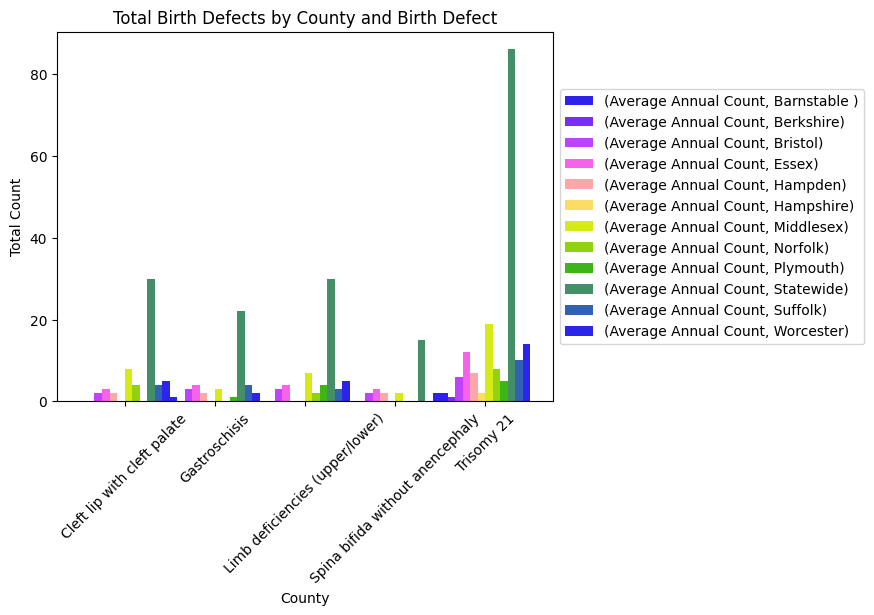

In [26]:
#plotting birth defects by county and defect

import matplotlib.pyplot as plt
import colorcet as cc #Googled colors for python and found colorcet website

BD_pivoting.plot(kind="bar", title="Total Birth Defects by County and Birth Defect", width=1.0, cmap=cc.cm.colorwheel)
plt.xlabel("County")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #used geeksfor geeks.org to help remember how to move legends
plt.show()

Trisomy 21 is the most popular birth defect with Worcester, Middlesex and Essex counties having the highest counts.

## **2.4. CANCER RATES datasets**

**PSEUDOCODE for Step 2.4**

combined all datasets together, sorted by geography

check the dataset to see that was good.

renamed some columns, checked dataset again

took longer tahn it should have to figure out how to add up the male and female counts by county and cancer type and make a new column for the total count and the total count per 100K. Used groupby for each column by gender and used .sum(). Then used pd.merge to combine on an outer join by county and cancer type.

removed the NS values, replaced with zeroes, changed to integers

Added up male/female counts for both columns

checked the dataset to make sure I mathed properly

removed the males/females individual counts for total cancer rate per 100K and reordered columns.

checked dataset again

pivoted info for cancer rates

checked datatypes, plotted cancer rates by county

In [27]:
#combining the 6 cancer files into one table and resetting the index

all_cancers = pd.concat([male_NHL, male_bladder, male_kidney, female_NHL, female_bladder, female_kidney], ignore_index=True)
all_cancers.sort_values(by=['Geography'], inplace=True)
all_cancers = all_cancers.reset_index(drop=True)

all_cancers

,Geography,Cancer Type,Sex,Annual Average Case Count,"Cancer Rate per 100,000 Population",Stability
0,Barnstable,Non-Hodgkin Lymphoma,Male,47,26.4,Stable
1,Barnstable,Kidney,Male,31,18.2,Stable
2,Barnstable,Bladder,Male,85,45.0,Stable
3,Barnstable,Non-Hodgkin Lymphoma,Female,35,14.9,Stable
4,Barnstable,Bladder,Female,29,11.8,Stable
...,...,...,...,...,...,...
85,Worcester,Kidney,Female,59,12.4,Stable
86,Worcester,Kidney,Male,109,25.2,Stable
87,Worcester,Bladder,Male,185,46.3,Stable
88,Worcester,Non-Hodgkin Lymphoma,Male,93,22.3,Stable


In [28]:
#changing "Geography" to County to match other tables and added year range

all_cancers.rename(columns={'Geography': 'County', 'Cancer Type': 'Cancer Type for 2011-2015', 'Annual Average Case Count': 'Annual Average Count'}, inplace=True)
all_cancers

,County,Cancer Type for 2011-2015,Sex,Annual Average Count,"Cancer Rate per 100,000 Population",Stability
0,Barnstable,Non-Hodgkin Lymphoma,Male,47,26.4,Stable
1,Barnstable,Kidney,Male,31,18.2,Stable
2,Barnstable,Bladder,Male,85,45.0,Stable
3,Barnstable,Non-Hodgkin Lymphoma,Female,35,14.9,Stable
4,Barnstable,Bladder,Female,29,11.8,Stable
...,...,...,...,...,...,...
85,Worcester,Kidney,Female,59,12.4,Stable
86,Worcester,Kidney,Male,109,25.2,Stable
87,Worcester,Bladder,Male,185,46.3,Stable
88,Worcester,Non-Hodgkin Lymphoma,Male,93,22.3,Stable


In [29]:
#groupng, merging and summing


#all_cancers.pivot_table(index=['County', 'Cancer Type for 2011-2015'], columns= 'Sex', aggfunc=sum, values='Annual Average Count').reset_index()......that worked but did not sum....hmmmm...missing something

#all_cancers_total = all_cancers.groupby(['County', 'Cancer Type for 2011-2015'])

#all_cancers_total = all_cancers_total['Annual Average Count'].agg(Male=("Sex", "sum"), Female=("Sex", "sum"), Sum=("Male", "sum") + ("Female", "sum")).reset_index()
#df_grouped = df_grouped["average count"].agg(male=("sex", "sum"), female=("sex", "sum"), Sum=("male", "sum") + ("female", "sum")).reset_index()

#male_counts = all_cancers[all_cancers["Sex"] == "Male"].groupby(["County", "Cancer Type for 2011-2015"])("Annual Average Count").sum().reset_index()

#all_cancers_total['Total Count'] = all_cancers_total['Male'] + all_cancers_total['Female']

#all_cancers_total['Sum'] = all_cancers_total.loc[:,['Female', 'Male']].sum(axis=1)
#all_cancers.head()

#print (all_cancers_total.dtypes)

#all_cancers_total['Female'] = all_cancers_total['Female'].fillna(0)
#all_cancers_total['Male'] = all_cancers_total['Male'].fillna(0)
#all_cancers_total

male_counts = all_cancers[all_cancers["Sex"] == "Male"].groupby(["County", "Cancer Type for 2011-2015"])["Annual Average Count"].sum().reset_index(name="Male")
female_counts = all_cancers[all_cancers["Sex"] == "Female"].groupby(["County", "Cancer Type for 2011-2015"])["Annual Average Count"].sum().reset_index(name="Female")

male_counts_per_100K = all_cancers[all_cancers["Sex"] == "Male"].groupby(["County", "Cancer Type for 2011-2015"])["Cancer Rate per 100,000 Population"].sum().reset_index(name="Males")
female_counts_per_100K = all_cancers[all_cancers["Sex"] == "Female"].groupby(["County", "Cancer Type for 2011-2015"])["Cancer Rate per 100,000 Population"].sum().reset_index(name="Females")


all_cancers_total = pd.merge(male_counts, female_counts, how="outer", on=["County", "Cancer Type for 2011-2015"])

all_cancers_total_100K = pd.merge(male_counts_per_100K, female_counts_per_100K, how="outer", on=["County", "Cancer Type for 2011-2015"])

all_cancer_TOTAL = pd.merge(all_cancers_total, all_cancers_total_100K, how='outer', on=['County', 'Cancer Type for 2011-2015'])


#all_cancers_total.columns

#all_cancers_total['Male'] = all_cancers_total['Male'].replace('NS', 0)....can't replace strings with numbers!!
#all_cancers_total['Female'] = all_cancers_total['Female'].replace('NS', 0)

all_cancers_total['Male'] = all_cancers_total['Male'].replace('NS', '0')
all_cancers_total['Female'] = all_cancers_total['Female'].replace('NS', '0')

all_cancers_total_100K['Males'] = all_cancers_total_100K['Males'].replace('NS', '0')
all_cancers_total_100K['Females'] = all_cancers_total_100K['Females'].replace('NS', '0')

all_cancers_total['Male'] = all_cancers_total['Male'].astype(str).astype(int)
all_cancers_total['Female'] = all_cancers_total['Female'].astype(str).astype(int)

all_cancers_total_100K['Males'] = all_cancers_total_100K['Males'].astype(str).astype(float)
all_cancers_total_100K['Females'] = all_cancers_total_100K['Females'].astype(str).astype(float)


all_cancer_TOTAL['Total Cancer Rate per 100,000 Population'] = all_cancers_total_100K['Males'] + all_cancers_total_100K['Females']
all_cancer_TOTAL['Total Count'] = all_cancers_total['Male'] + all_cancers_total['Female']

#print (all_cancer_TOTAL.dtypes)

#all_cancer_TOTAL


columns_drop = ['Males', 'Females']
all_cancer_TOTAL = all_cancer_TOTAL.drop(columns=columns_drop)

all_cancer_TOTAL = all_cancer_TOTAL[['County', 'Cancer Type for 2011-2015', 'Male', 'Female', 'Total Count', 'Total Cancer Rate per 100,000 Population']]

all_cancer_TOTAL



,County,Cancer Type for 2011-2015,Male,Female,Total Count,"Total Cancer Rate per 100,000 Population"
0,Barnstable,Bladder,85,29,114,56.8
1,Barnstable,Kidney,31,18,49,28.2
2,Barnstable,Non-Hodgkin Lymphoma,47,35,82,41.3
3,Berkshire,Bladder,39,13,52,55.0
4,Berkshire,Kidney,18,11,29,31.6
5,Berkshire,Non-Hodgkin Lymphoma,20,17,37,39.2
6,Bristol,Bladder,125,44,169,54.3
7,Bristol,Kidney,69,38,107,32.8
8,Bristol,Non-Hodgkin Lymphoma,65,60,125,38.6
9,Dukes,Bladder,6,NS,6,54.1


In [30]:
cancer_pivoting = all_cancer_TOTAL.pivot_table(
    values=["Total Count"],
    index="Cancer Type for 2011-2015",
    columns=["County"],
    aggfunc='sum'
)

cancer_pivoting

Total Count                                          \
County                     Barnstable Berkshire Bristol Dukes  Essex Franklin   
Cancer Type for 2011-2015                                                       
Bladder                         114.0      52.0   169.0   6.0  241.0     21.0   
Kidney                           49.0      29.0   107.0   2.0  141.0     14.0   
NHL                               NaN       NaN     NaN   NaN    NaN      NaN   
Non-Hodgkin Lymphoma             82.0      37.0   125.0   5.0  205.0     14.0   

                                                                         \
County                    Hampden Hampshire Middlesex Nantucket Norfolk   
Cancer Type for 2011-2015                                                 
Bladder                     112.0      36.0     398.0       2.0   184.0   
Kidney                       98.0      28.0     261.0       0.0   144.0   
NHL                           NaN       NaN       NaN       NaN     NaN   
Non-Hodgkin Lymphoma        107.0      35.0     332.0       0.0   170.0   

                                                                
County                    Plymouth Statewide Suffolk Worcester  
Cancer Type for 2011-2015                                       
Bladder                      168.0    1883.0   126.0     251.0  
Kidney                       116.0    1264.0   105.0     168.0  
NHL                            NaN    1517.0     NaN       NaN  
Non-Hodgkin Lymphoma         112.0       NaN   127.0     164.0

In [31]:
#checking/converting datatype, repacing NaNs

cancer_pivoting.dtypes
cancer_pivoting = cancer_pivoting.replace(np.nan, 0)


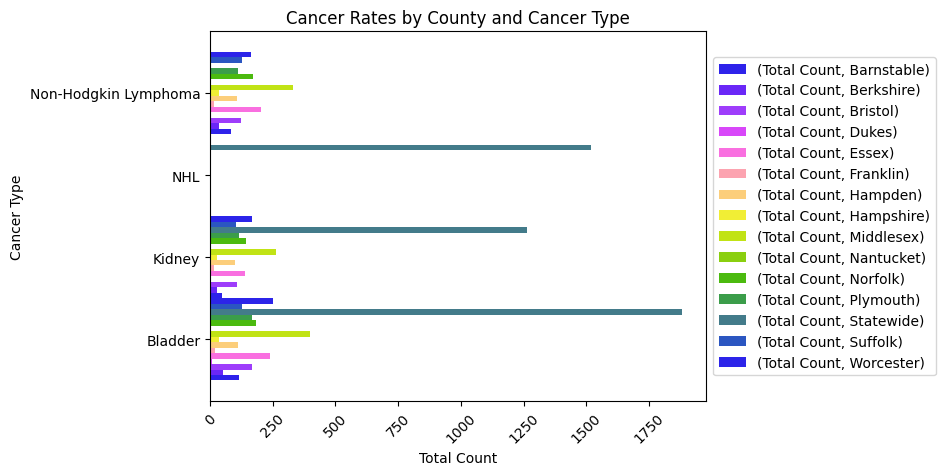

In [32]:
cancer_pivoting.plot(kind="barh", title="Cancer Rates by County and Cancer Type", width=1.0, cmap=cc.cm.colorwheel)
plt.xlabel("Total Count")
plt.ylabel("Cancer Type")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.cm.viridis(np.linspace(0, 1, 15 * 2))
plt.show()

Of course statewide counts will be high, but Middlesex and Barnstable and Essex seem to stand out for higher rates of cancers. The rates for cancer types are fairly close for  kidney and NHL, but bladder has the most incidents.

## **2.5. JOINING THE DATASETS**

**PSEUDOCODE for Step 2.5**

Used and outer join on County to join the cancer rate and birth defect rates

Then joined the birth_cancer_rates with the contaminant data using an outer join on county. Saved to all_data.

removed NAs, checked the dataset

made sure data types were correct for calculations and analysis

double checked data types

In [33]:
#joing 2 datasets by county

birth_cancer_rates = all_cancer_TOTAL.merge(birth_defects, how='outer', on='County')
birth_cancer_rates


#all counties are not matching up.....hmmmm.....

,County,Cancer Type for 2011-2015,Male,Female,Total Count,"Total Cancer Rate per 100,000 Population",Birth Defects for 2011-2015,Average Annual Count,"Prevalence per 10,000 Live Births",95% Lower Confidence Interval,95% Upper Confidence Interval,Stability
0,Barnstable,Bladder,85,29,114.0,56.8,NaN,NaN,NaN,NaN,NaN,NaN
1,Barnstable,Kidney,31,18,49.0,28.2,NaN,NaN,NaN,NaN,NaN,NaN
2,Barnstable,Non-Hodgkin Lymphoma,47,35,82.0,41.3,NaN,NaN,NaN,NaN,NaN,NaN
3,Berkshire,Bladder,39,13,52.0,55.0,Trisomy 21,1,12.7,5.1,26.3,Unstable
4,Berkshire,Kidney,18,11,29.0,31.6,Trisomy 21,1,12.7,5.1,26.3,Unstable
...,...,...,...,...,...,...,...,...,...,...,...,...
132,Worcester,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Spina bifida without anencephaly,2,2.5,1.3,4.6,Unstable
133,Worcester,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Gastroschisis,2,2.8,1.4,4.8,
134,Worcester,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Trisomy 21,14,15.7,12.2,19.9,
135,Barnstable,NaN,NaN,NaN,NaN,NaN,Gastroschisis,1,6.5,2.4,14.2,Unstable


In [34]:
all_data = all_contaminants.merge(birth_cancer_rates, how='outer', on='County')

all_data

,County,Year,Community Water System (CWS),MCL (ug/L),Concentration (ug/L),Contaminant,rolling_avg for 2011-2015,Cancer Type for 2011-2015,Male,Female,Total Count,"Total Cancer Rate per 100,000 Population",Birth Defects for 2011-2015,Average Annual Count,"Prevalence per 10,000 Live Births",95% Lower Confidence Interval,95% Upper Confidence Interval,Stability
0,Barnstable,2015.0,Falmouth Water Dept.,80.00,80.7,TTHM,NaN,Bladder,85,29,114.0,56.8,NaN,NaN,NaN,NaN,NaN,NaN
1,Barnstable,2015.0,Falmouth Water Dept.,80.00,80.7,TTHM,NaN,Kidney,31,18,49.0,28.2,NaN,NaN,NaN,NaN,NaN,NaN
2,Barnstable,2015.0,Falmouth Water Dept.,80.00,80.7,TTHM,NaN,Non-Hodgkin Lymphoma,47,35,82.0,41.3,NaN,NaN,NaN,NaN,NaN,NaN
3,Berkshire,2011.0,Egremont Water Dept.,15.00,54.0,Lead,NaN,Bladder,39,13,52.0,55.0,Trisomy 21,1,12.7,5.1,26.3,Unstable
4,Berkshire,2011.0,Egremont Water Dept.,15.00,54.0,Lead,NaN,Kidney,18,11,29.0,31.6,Trisomy 21,1,12.7,5.1,26.3,Unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,Statewide,NaN,NaN,NaN,NaN,NaN,NaN,NHL,809,708,1517.0,39.7,Cleft lip with cleft palate,30,4.1,3.5,4.9,
1087,Statewide,NaN,NaN,NaN,NaN,NaN,NaN,NHL,809,708,1517.0,39.7,Trisomy 21,86,12,10.9,13.2,
1088,Statewide,NaN,NaN,NaN,NaN,NaN,NaN,NHL,809,708,1517.0,39.7,Gastroschisis,22,3.1,2.5,3.7,
1089,Barnstable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gastroschisis,1,6.5,2.4,14.2,Unstable


In [35]:
#removing data with NAs

no_NAN_all_data = all_data[~all_data.isnull().any(axis=1)]
#no_nans = df[~df.isnull().any(axis=1)]


no_NAN_all_data

,County,Year,Community Water System (CWS),MCL (ug/L),Concentration (ug/L),Contaminant,rolling_avg for 2011-2015,Cancer Type for 2011-2015,Male,Female,Total Count,"Total Cancer Rate per 100,000 Population",Birth Defects for 2011-2015,Average Annual Count,"Prevalence per 10,000 Live Births",95% Lower Confidence Interval,95% Upper Confidence Interval,Stability
36,Bristol,2014.0,Somerset Water Department,80.00,82.4,TTHM,52.62,Bladder,125,44,169.0,54.3,Gastroschisis,3,4.6,2.4,7.8,
37,Bristol,2014.0,Somerset Water Department,80.00,82.4,TTHM,52.62,Bladder,125,44,169.0,54.3,Spina bifida without anencephaly,2,2.8,1.2,5.5,Unstable
38,Bristol,2014.0,Somerset Water Department,80.00,82.4,TTHM,52.62,Bladder,125,44,169.0,54.3,Trisomy 21,6,10.9,7.4,15.5,
39,Bristol,2014.0,Somerset Water Department,80.00,82.4,TTHM,52.62,Bladder,125,44,169.0,54.3,Cleft lip with cleft palate,2,3.2,1.5,6.0,Unstable
40,Bristol,2014.0,Somerset Water Department,80.00,82.4,TTHM,52.62,Bladder,125,44,169.0,54.3,Limb deficiencies (upper/lower),3,4.9,2.7,8.3,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,Worcester,2015.0,Cherry Valley/ Rochdale Water District,80.00,84.0,TTHM,53.80,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Limb deficiencies (upper/lower),5,5.3,3.4,8.0,
1061,Worcester,2015.0,Cherry Valley/ Rochdale Water District,80.00,84.0,TTHM,53.80,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Cleft lip with cleft palate,5,6.0,3.9,8.8,
1062,Worcester,2015.0,Cherry Valley/ Rochdale Water District,80.00,84.0,TTHM,53.80,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Spina bifida without anencephaly,2,2.5,1.3,4.6,Unstable
1063,Worcester,2015.0,Cherry Valley/ Rochdale Water District,80.00,84.0,TTHM,53.80,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Gastroschisis,2,2.8,1.4,4.8,


In [36]:
#making sure all data types are appropriate for calculations

#no_NAN_all_data.dtypes

#no_NAN_all_data["Year"] = no_NAN_all_data["Year"].astype(str).astype(int)
no_NAN_all_data["Male"] = no_NAN_all_data["Male"].astype(str).astype(int)
no_NAN_all_data["Female"] = no_NAN_all_data["Female"].astype(str).astype(int)
no_NAN_all_data["MCL (ug/L)"] = no_NAN_all_data["MCL (ug/L)"].astype(str).astype(float)
no_NAN_all_data["Average Annual Count"] = no_NAN_all_data["Average Annual Count"].astype(str).astype(int)
no_NAN_all_data["Prevalence per 10,000 Live Births"] = no_NAN_all_data["Prevalence per 10,000 Live Births"].astype(str).astype(float)
no_NAN_all_data["95% Lower Confidence Interval"] = no_NAN_all_data["95% Lower Confidence Interval"].astype(str).astype(float)
no_NAN_all_data["95% Upper Confidence Interval"] = no_NAN_all_data["95% Upper Confidence Interval"].astype(str).astype(float)

no_NAN_all_data.dtypes #data types correct now

<ipython-input-36-34821ea4150b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_NAN_all_data["Male"] = no_NAN_all_data["Male"].astype(str).astype(int)
<ipython-input-36-34821ea4150b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_NAN_all_data["Female"] = no_NAN_all_data["Female"].astype(str).astype(int)
<ipython-input-36-34821ea4150b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

County                                       object
Year                                        float64
Community Water System (CWS)                 object
MCL (ug/L)                                  float64
Concentration (ug/L)                        float64
Contaminant                                  object
rolling_avg for 2011-2015                   float64
Cancer Type for 2011-2015                    object
Male                                          int64
Female                                        int64
Total Count                                 float64
Total Cancer Rate per 100,000 Population    float64
Birth Defects for 2011-2015                  object
Average Annual Count                          int64
Prevalence per 10,000 Live Births           float64
95% Lower Confidence Interval               float64
95% Upper Confidence Interval               float64
Stability                                    object
dtype: object

# **3.0. DEFINING A FUNCTION**

In [37]:
#function to calculate the percent by which the measured water contaminant was over the MCL
#used week05/assignment02 to get the punctuation correct and doctest import, etc.

def percent_over (measured_conc, max_conc):
    """float -> float    inputting 2 floats to return a float in ug/L

    define a function that takes in the measured water contaminant concentration and the maximum concentration for that contaminant and calculates
    the percent that the measured conc is over the max conc

    PSEUDOCODE:
    This equation will calculate the percent that the measured conc has exceeded the maximum allowable conc and round to one decimal.
    if the measured_conc is less than or equal to the max_conc, then return 0
    otherwise, subtract the max_conc from the measured_conc and save to the variable exceeds
    percent_over equals exceeds minus the max_conc then multiply by 100 to get the %
    return the percent_over rounded to one decimal

    >>> percent_over(54.00, 15.00)
    260.0

    >>> percent_over(82.4, 80.0)
    3.0
    """
    if measured_conc <= max_conc:
      return 0
    exceeds = measured_conc - max_conc
    percent_over = (exceeds / max_conc) * 100

    return round(percent_over, 1)



In [38]:
assert percent_over(54.00, 15.00) == 260.0
assert percent_over(82.4, 80.0) == 3.0
assert percent_over(41.2, 50.0) == 0.0
assert percent_over(56.3, 32.1) == 75.4

In [39]:
import doctest
doctest.run_docstring_examples(percent_over, globals(), verbose=True)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



Finding tests in NoName
Trying:
    percent_over(54.00, 15.00)
Expecting:
    260.0
ok
Trying:
    percent_over(82.4, 80.0)
Expecting:
    3.0
ok


In [40]:
#adding defined function in as additional column


no_NAN_all_data['Percent Over MCL'] = no_NAN_all_data.apply(lambda x: percent_over(x['Concentration (ug/L)'], x['MCL (ug/L)']), axis=1)

no_NAN_all_data

<ipython-input-40-1d786e999bc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_NAN_all_data['Percent Over MCL'] = no_NAN_all_data.apply(lambda x: percent_over(x['Concentration (ug/L)'], x['MCL (ug/L)']), axis=1)


,County,Year,Community Water System (CWS),MCL (ug/L),Concentration (ug/L),Contaminant,rolling_avg for 2011-2015,Cancer Type for 2011-2015,Male,Female,Total Count,"Total Cancer Rate per 100,000 Population",Birth Defects for 2011-2015,Average Annual Count,"Prevalence per 10,000 Live Births",95% Lower Confidence Interval,95% Upper Confidence Interval,Stability,Percent Over MCL
36,Bristol,2014.0,Somerset Water Department,80.0,82.4,TTHM,52.62,Bladder,125,44,169.0,54.3,Gastroschisis,3,4.6,2.4,7.8,,3.0
37,Bristol,2014.0,Somerset Water Department,80.0,82.4,TTHM,52.62,Bladder,125,44,169.0,54.3,Spina bifida without anencephaly,2,2.8,1.2,5.5,Unstable,3.0
38,Bristol,2014.0,Somerset Water Department,80.0,82.4,TTHM,52.62,Bladder,125,44,169.0,54.3,Trisomy 21,6,10.9,7.4,15.5,,3.0
39,Bristol,2014.0,Somerset Water Department,80.0,82.4,TTHM,52.62,Bladder,125,44,169.0,54.3,Cleft lip with cleft palate,2,3.2,1.5,6.0,Unstable,3.0
40,Bristol,2014.0,Somerset Water Department,80.0,82.4,TTHM,52.62,Bladder,125,44,169.0,54.3,Limb deficiencies (upper/lower),3,4.9,2.7,8.3,,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,Worcester,2015.0,Cherry Valley/ Rochdale Water District,80.0,84.0,TTHM,53.80,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Limb deficiencies (upper/lower),5,5.3,3.4,8.0,,5.0
1061,Worcester,2015.0,Cherry Valley/ Rochdale Water District,80.0,84.0,TTHM,53.80,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Cleft lip with cleft palate,5,6.0,3.9,8.8,,5.0
1062,Worcester,2015.0,Cherry Valley/ Rochdale Water District,80.0,84.0,TTHM,53.80,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Spina bifida without anencephaly,2,2.5,1.3,4.6,Unstable,5.0
1063,Worcester,2015.0,Cherry Valley/ Rochdale Water District,80.0,84.0,TTHM,53.80,Non-Hodgkin Lymphoma,93,71,164.0,36.8,Gastroschisis,2,2.8,1.4,4.8,,5.0


Combining the data, while nice to have altogether, might not have been the wisest move. Counties repeated several times because the birth defect is different even though the contaminant was the same. This will likely interfere with any plotting efforts.

Will use combined dataset with pivot_table to make more useable.

In [41]:
#looking at cancer rates and contaminant levels

cancer_contaminant = no_NAN_all_data.pivot_table(
    values=["Concentration (ug/L)", "Total Count"],
    index="County",
    columns=["Contaminant", "Cancer Type for 2011-2015"],
)

cancer_contaminant

Concentration (ug/L)                              \
Contaminant                            Arsenic                               
Cancer Type for 2011-2015              Bladder Kidney Non-Hodgkin Lymphoma   
County                                                                       
Bristol                                    NaN    NaN                  NaN   
Essex                                      NaN    NaN                  NaN   
Hampden                                    NaN    NaN                  NaN   
Hampshire                                  NaN    NaN                  NaN   
Middlesex                                  NaN    NaN                  NaN   
Norfolk                                    NaN    NaN                  NaN   
Plymouth                                   NaN    NaN                  NaN   
Suffolk                                    NaN    NaN                  NaN   
Worcester                                 19.5   19.5                 19.5   

                                                                           \
Contaminant                  DEPH                                    Lead   
Cancer Type for 2011-2015 Bladder Kidney Non-Hodgkin Lymphoma     Bladder   
County                                                                      
Bristol                       NaN    NaN                  NaN         NaN   
Essex                         NaN    NaN                  NaN   19.000000   
Hampden                       NaN    NaN                  NaN         NaN   
Hampshire                     NaN    NaN                  NaN   18.000000   
Middlesex                     NaN    NaN                  NaN  477.700000   
Norfolk                       NaN    NaN                  NaN   40.750000   
Plymouth                      NaN    NaN                  NaN   38.000000   
Suffolk                       NaN    NaN                  NaN   21.950000   
Worcester                    39.0   39.0                 39.0   39.333333   

                                                                    ...  \
Contaminant                                                Nitrate  ...   
Cancer Type for 2011-2015      Kidney Non-Hodgkin Lymphoma Bladder  ...   
County                                                              ...   
Bristol                           NaN                  NaN     NaN  ...   
Essex                       19.000000            19.000000     NaN  ...   
Hampden                           NaN                  NaN     NaN  ...   
Hampshire                   18.000000            18.000000     NaN  ...   
Middlesex                  477.700000           477.700000     NaN  ...   
Norfolk                     40.750000            40.750000     NaN  ...   
Plymouth                    38.000000            38.000000     NaN  ...   
Suffolk                     21.950000            21.950000     NaN  ...   
Worcester                   39.333333            39.333333    15.0  ...   

                                   Total Count                 \
Contaminant                               DEPH    Lead          
Cancer Type for 2011-2015 Non-Hodgkin Lymphoma Bladder Kidney   
County                                                          
Bristol                                    NaN     NaN    NaN   
Essex                                      NaN   241.0  141.0   
Hampden                                    NaN     NaN    NaN   
Hampshire                                  NaN    36.0   28.0   
Middlesex                                  NaN   398.0  261.0   
Norfolk                                    NaN   184.0  144.0   
Plymouth                                   NaN   168.0  116.0   
Suffolk                                    NaN   126.0  105.0   
Worcester                                164.0   251.0  168.0   

                                                               \
Contaminant                                    Nitrate          
Cancer Type for 2011-2015 Non-Hodgkin Lymphoma Bladder Ki

In [42]:
#looking at birth defect rates and comtaminant levels

birth_defects_contaminant = no_NAN_all_data.pivot_table(
    values=["Concentration (ug/L)", "Average Annual Count"],
    index="County",
    columns=["Contaminant", "Birth Defects for 2011-2015"],
)

birth_defects_contaminant

Average Annual Count                \
Contaminant                                     Arsenic                 
Birth Defects for 2011-2015 Cleft lip with cleft palate Gastroschisis   
County                                                                  
Bristol                                             NaN           NaN   
Essex                                               NaN           NaN   
Hampden                                             NaN           NaN   
Hampshire                                           NaN           NaN   
Middlesex                                           NaN           NaN   
Norfolk                                             NaN           NaN   
Plymouth                                            NaN           NaN   
Suffolk                                             NaN           NaN   
Worcester                                           5.0           2.0   

                                                             \
Contaminant                                                   
Birth Defects for 2011-2015 Limb deficiencies (upper/lower)   
County                                                        
Bristol                                                 NaN   
Essex                                                   NaN   
Hampden                                                 NaN   
Hampshire                                               NaN   
Middlesex                                               NaN   
Norfolk                                                 NaN   
Plymouth                                                NaN   
Suffolk                                                 NaN   
Worcester                                               5.0   

                                                                         \
Contaminant                                                               
Birth Defects for 2011-2015 Spina bifida without anencephaly Trisomy 21   
County                                                                    
Bristol                                                  NaN        NaN   
Essex                                                    NaN        NaN   
Hampden                                                  NaN        NaN   
Hampshire                                                NaN        NaN   
Middlesex                                                NaN        NaN   
Norfolk                                                  NaN        NaN   
Plymouth                                                 NaN        NaN   
Suffolk                                                  NaN        NaN   
Worcester                                                2.0       14.0   

                                                                       \
Contaminant                                        DEPH                 
Birth Defects for 2011-2015 Cleft lip with cleft palate Gastroschisis   
County                                                                  
Bristol                                             NaN           NaN   
Essex                                               NaN           NaN   
Hampden                                             NaN           NaN   
Hampshire                                           NaN           NaN   
Middlesex                                           NaN           NaN   
Norfolk                                             NaN           NaN   
Plymouth                                            NaN           NaN   
Suffolk                                             NaN           NaN   
Worcester                                           5.0           2.0   

                                                             \
Contaminant                                                   
Birth Defects for 2011-2015 Limb deficiencies (upper/lower)   
County                                                        
Bristol                                                 NaN   
Essex                   

In [43]:
#tried all 3...total cancer rates, annual birth defect counts and contamination rates

all_3 = no_NAN_all_data.pivot_table(
    values=["Total Count", "Average Annual Count", "Concentration (ug/L)"],
    index="County",
    columns=["Cancer Type for 2011-2015", "Birth Defects for 2011-2015", "Contaminant"],
)

all_3

Average Annual Count                    \
Cancer Type for 2011-2015                       Bladder                     
Birth Defects for 2011-2015 Cleft lip with cleft palate                     
Contaminant                                     Arsenic DEPH Lead Nitrate   
County                                                                      
Bristol                                             NaN  NaN  NaN     NaN   
Essex                                               NaN  NaN  3.0     NaN   
Hampden                                             NaN  NaN  NaN     NaN   
Hampshire                                           NaN  NaN  NaN     NaN   
Middlesex                                           NaN  NaN  8.0     NaN   
Norfolk                                             NaN  NaN  4.0     NaN   
Plymouth                                            NaN  NaN  NaN     NaN   
Suffolk                                             NaN  NaN  4.0     NaN   
Worcester                                           5.0  5.0  5.0     5.0   

                                                                       ...  \
Cancer Type for 2011-2015                                              ...   
Birth Defects for 2011-2015      Gastroschisis                         ...   
Contaminant                 TTHM       Arsenic DEPH Lead Nitrate TTHM  ...   
County                                                                 ...   
Bristol                      2.0           NaN  NaN  NaN     NaN  3.0  ...   
Essex                        3.0           NaN  NaN  4.0     NaN  4.0  ...   
Hampden                      2.0           NaN  NaN  NaN     NaN  2.0  ...   
Hampshire                    NaN           NaN  NaN  NaN     NaN  NaN  ...   
Middlesex                    8.0           NaN  NaN  3.0     NaN  3.0  ...   
Norfolk                      NaN           NaN  NaN  NaN     NaN  NaN  ...   
Plymouth                     NaN           NaN  NaN  1.0     NaN  1.0  ...   
Suffolk                      NaN           NaN  NaN  4.0     NaN  NaN  ...   
Worcester                    5.0           2.0  2.0  2.0     2.0  2.0  ...   

                                                 Total Count                \
Cancer Type for 2011-2015               Non-Hodgkin Lymphoma                 
Birth Defects for 2011-2015 Spina bifida without anencephaly                 
Contaminant                                          Arsenic   DEPH   Lead   
County                                                                       
Bristol                                                  NaN    NaN    NaN   
Essex                                                    NaN    NaN  205.0   
Hampden                                                  NaN    NaN    NaN   
Hampshire                                                NaN    NaN    NaN   
Middlesex                                                NaN    NaN  332.0   
Norfolk                                                  NaN    NaN    NaN   
Plymouth                                                 NaN    NaN    NaN   
Suffolk                                                  NaN    NaN    NaN   
Worcester                                              164.0  164.0  164.0   

                                                                             \
Cancer Type for 2011-2015                                                     
Birth Defects for 2011-2015                Trisomy 21                         
Contaminant                 Nitrate   TTHM    Arsenic   DEPH   Lead Nitrate   
County                                                                        
Bristol                         NaN  125.0        NaN    NaN    NaN     NaN   
Essex                           NaN  205.0        NaN    NaN  205.0     NaN   
Hampden                         NaN  107.0        NaN    NaN    NaN     NaN   
Hampshire                       NaN    NaN        NaN    NaN   35.0     NaN   
Middlesex                       NaN  332.0        NaN    Na

## **4.0. PLOTTING**

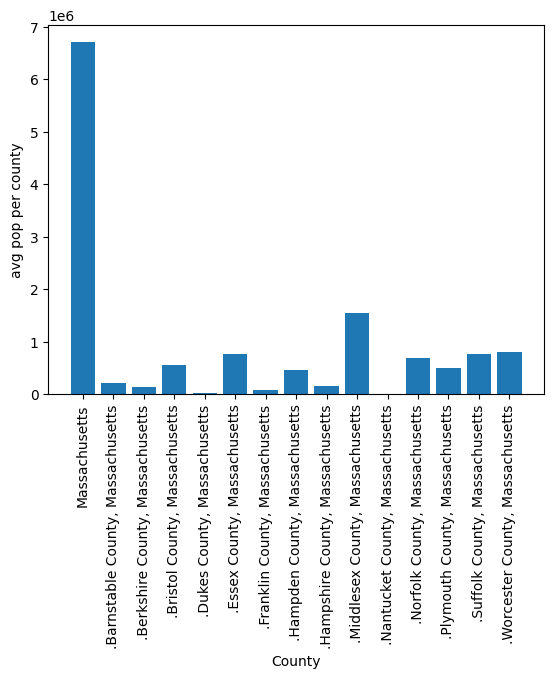

In [44]:
#MA_pop plotted by county

import seaborn as sns

plt.bar(MA_pop['County'], MA_pop['avg_pop'])
plt.xlabel('County')
plt.ylabel('avg pop per county')
plt.xticks(rotation=90)
plt.show()


Middlesex is the largest county, almost double the others, so it makes some sense that all rates of cancer and defects will be higher in general.

<function matplotlib.pyplot.show(close=None, block=None)>

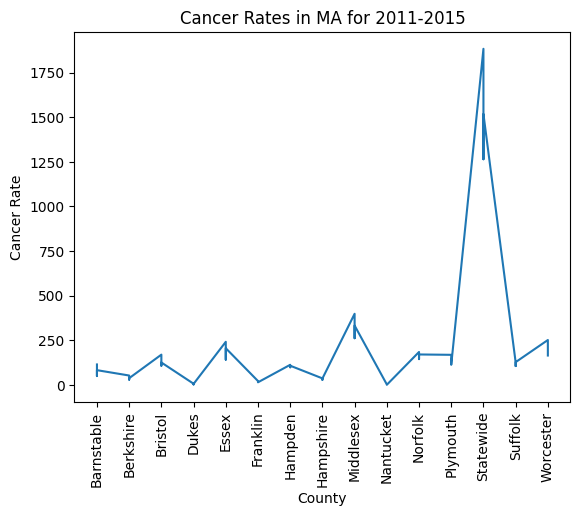

In [45]:
#total cancer rates by county

plt.plot(all_cancer_TOTAL['County'], all_cancer_TOTAL['Total Count'])
plt.xlabel('County')
plt.ylabel('Cancer Rate')
plt.title('Cancer Rates in MA for 2011-2015')
plt.xticks(rotation=90)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

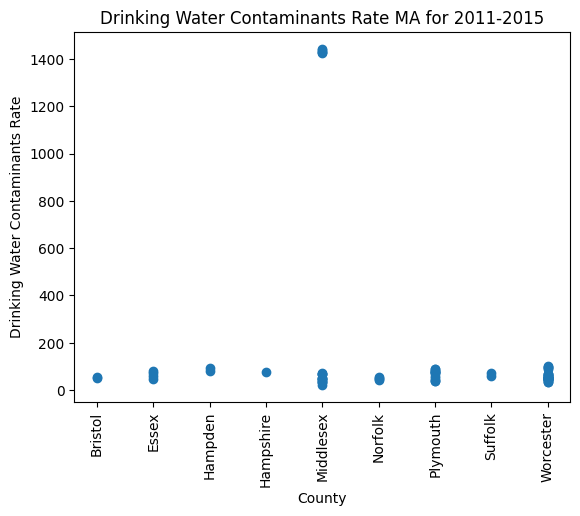

In [46]:
plt.scatter(all_contaminants['County'], all_contaminants['rolling_avg for 2011-2015'])
plt.xlabel('County')
plt.ylabel('Drinking Water Contaminants Rate')
plt.title('Drinking Water Contaminants Rate MA for 2011-2015')
plt.xticks(rotation=90)
plt.show


Essex, Middlesex, Plymouth, and Worcester have had several measurements that violate MCLs. Middlesex also has a very high measurement, but could be an outlier. From previous graphs, Middlesex and Essex also have higher cancer rates and higher Trisomy 21 birth defect rates.

## **5.0. STATISTICAL ANALYSIS**

**ORDINARY LEAST SQUARES (OLS)**

**PSEUDOCODE for Step 5.0**

Attemptimg to check relationships between residuals and predicted values. Familiar with this in R, but needed to Google to figure out correct packages for python. Used geeksforgeeks.org and w3resource.com and class online book resource to get this going.

imported several packages



In [48]:
#importing packages for various analyses

#Contaminant info is the independent variable (either the conc, or rolling avg) and the all cancer rates and birth defect info are dependent variables


from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

#pip install biopython

#using OLS for contaminant rolling avg and birth defect avg annual count

X = no_NAN_all_data['rolling_avg for 2011-2015']
y = no_NAN_all_data['Average Annual Count']

reg = sm.OLS(y, X).fit()

reg.summary()

reg.resid



36       2.621588
37       1.621588
38       5.621588
39       1.621588
40       2.621588
          ...    
1060     4.613102
1061     4.613102
1062     1.613102
1063     1.613102
1064    13.613102
Length: 993, dtype: float64

<ipython-input-49-5cf4cd648bb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_NAN_all_data["predicted"] = reg.predict(X)
<ipython-input-49-5cf4cd648bb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_NAN_all_data["residuals"] = reg.resid


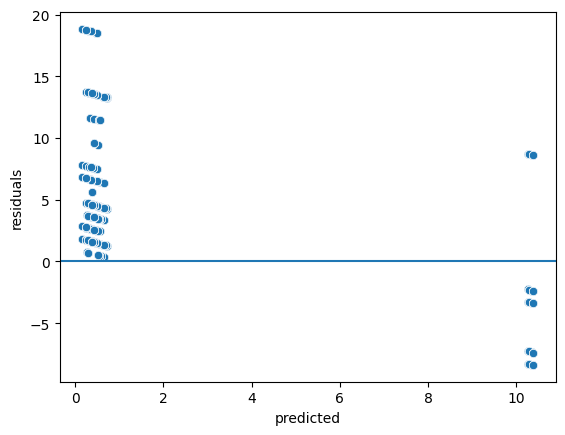

In [49]:
no_NAN_all_data["predicted"] = reg.predict(X)
no_NAN_all_data["residuals"] = reg.resid
sns.scatterplot(data=no_NAN_all_data, x="predicted", y="residuals")
plt.axhline(y=0)

RESULTS: There is a definite pattern here, so this likely is not the best method for this data.

In [50]:
#OLS using contaminant and total counts for cancer rates

X = no_NAN_all_data['rolling_avg for 2011-2015']
y = no_NAN_all_data['Total Count']

reg = sm.OLS(y, X).fit()

reg.summary()

reg.resid

36      153.513609
37      153.513609
38      153.513609
39      153.513609
40      153.513609
           ...    
1060    148.166328
1061    148.166328
1062    148.166328
1063    148.166328
1064    148.166328
Length: 993, dtype: float64

<ipython-input-51-5cf4cd648bb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_NAN_all_data["predicted"] = reg.predict(X)
<ipython-input-51-5cf4cd648bb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_NAN_all_data["residuals"] = reg.resid


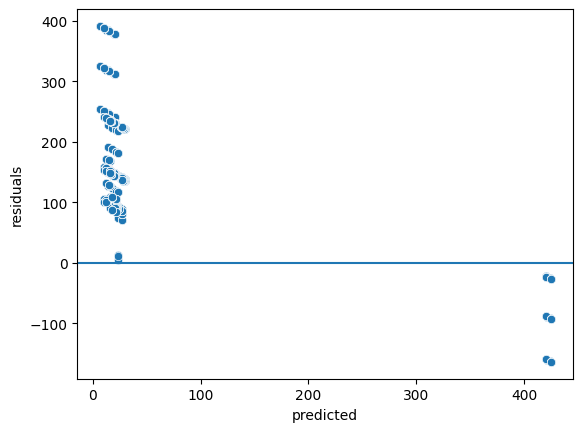

In [51]:
no_NAN_all_data["predicted"] = reg.predict(X)
no_NAN_all_data["residuals"] = reg.resid
sns.scatterplot(data=no_NAN_all_data, x="predicted", y="residuals")
plt.axhline(y=0)

RESULTS: Again, there is a distinct pattern here so OLS is not the best method for this data.

In [52]:
#Anova with contaminant conc and annual birth defect rates

anova_results1 = f_oneway(no_NAN_all_data['Concentration (ug/L)'], no_NAN_all_data['Average Annual Count'])

anova_results1


F_onewayResult(statistic=34.20924313957755, pvalue=5.774713286693317e-09)

The p-value is less than 0.5 and therefore the relationship is statistically significant. More analysis is needed to determine the strength of the relationship.

In [53]:
#Anova with contaminant conc and annual cancer rates

anova_results2 = f_oneway(no_NAN_all_data['Concentration (ug/L)'], no_NAN_all_data['Total Count'])

anova_results2

F_onewayResult(statistic=4.259346260567837, pvalue=0.03916471118330646)

Again the p-value is less than 0.5 implying a statistically significant releationship.

In [ ]:
#perform two-way ANOVA.....tried to do 2-way anova that we used in R, but could not make it work in python....likely a punctuation error


#model = ols('Concentration ~ Total Count + Average Annual Count + Average Annual Count:Total Count', data=no_NAN_all_data).fit()
#results = sm.stats.anova_lm(model, typ=2)

### **SUMMARY:**

In summary, there does seem to be a significant relationship between the higher water contaminant rates in a couple of MA counties (Middlesex, Essex) and higher incidents of cancer and birth defects (especially Trisomy 21).  OLS was not the proper method to prove this point, but the anova p-values were significant between water contamination rates and cancer and contamination rates and birth defects.